# The Sparks Foundation GRIP program

## **Data Science & Business Analytics Internship #GRIPAPR21**

## **Task-2 :  From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually. (Prediction using Unsupervised Machine Learning)**

### Dataset :  https://bit.ly/3kXTdox

## By Nikhil Shrestha

## Importing Required Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Load and Read Dataset

In [51]:
# Load and Read Dataset
df = pd.read_csv('Iris.csv')
df.head(10) #returns first 10 entries

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [52]:
# returns the number of rows and columns

df.shape

(150, 6)

__Rows: 150 and Column: 6__

## Duplicate data and Null Values?


In [53]:
## Checking for duplicate data and Null Values
df= df.drop_duplicates()
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

__This shows that the data does not contain any null values.__



## Describing the data 


In [54]:
df.describe()  ## Provides the statistics of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


__Describing the data statistically__

## Data needs processing??

In [55]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


__Looks like our data doesn't need preprocessing. Let's check for outliers.__


## Detecting Outliers

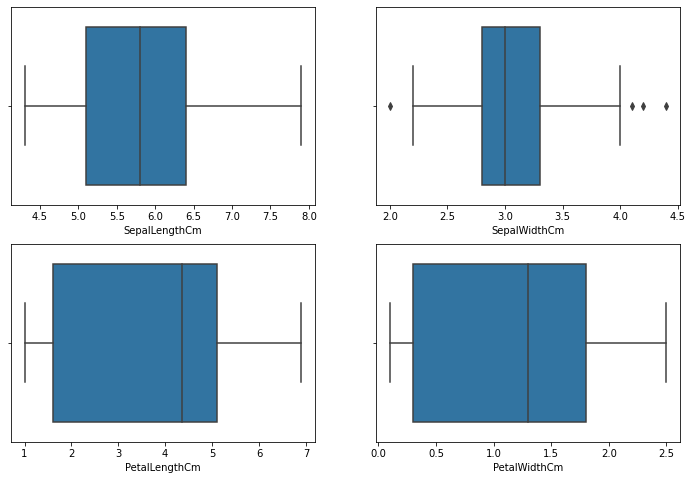

In [56]:
fig,axes = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(df['SepalLengthCm'],ax=axes[0,0])
sns.boxplot(df['SepalWidthCm'],ax=axes[0,1])
sns.boxplot(df['PetalLengthCm'],ax=axes[1,0])
sns.boxplot(df['PetalWidthCm'],ax=axes[1,1])

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

__Some outliers in the SepalWidthcm attribute__

## Outliers Treatment (Quantile-based Flooring and Capping)


In [57]:
q1 = df['SepalWidthCm'].quantile(0.01) #flooring the 10th percentile for lower values
q2 = df['SepalWidthCm'].quantile(0.99) #capping the 90th percentile for higher values

df.shape # To find out the number of rows and column after outlier treatment

(150, 6)

__Treated Outliers__


## Standardizing Data : Mean =0 & Standard Deviation=1


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Species',axis=1))

## Converting Scaled DataSet ->DataFrame

In [59]:
#Converting Standarized data into dataframe
df_dataframed = pd.DataFrame(df_scaled,columns=df.columns.drop('Species'))
df_dataframed.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977
5,-1.605069,-0.537178,1.957669,-1.170675,-1.050031
6,-1.581975,-1.506521,0.800654,-1.341272,-1.181504
7,-1.558880,-1.021849,0.800654,-1.284407,-1.312977
8,-1.535786,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.512691,-1.143017,0.106445,-1.284407,-1.444450


## Correlation between the parameters


In [60]:
df_dataframed.corr() #defines correlation between the parameters

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Plotting the correlation data

<AxesSubplot:>

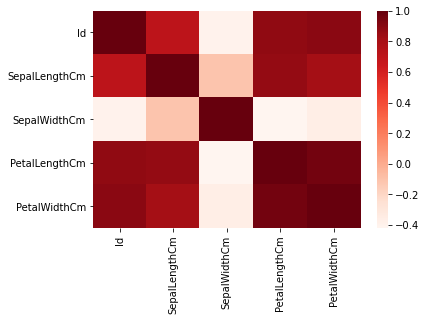

In [61]:
sns.heatmap(df_dataframed.corr(),cmap='Reds')

## Determining the value of k using elbow method (Finding the optimum number of clusters)

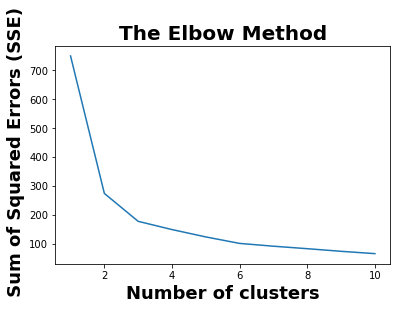

In [62]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df_dataframed)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=20,fontweight='bold')
plt.xlabel('Number of clusters',fontsize=18,fontweight='bold')
plt.ylabel(' Sum of Squared Errors (SSE)',fontsize=18,fontweight='bold')
plt.show()



__Elbow curve starts Forming around the value, when x = 3
Therefore, Number of Optimum clusters = 3__

## Applying KMeans and Predicting

In [63]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_pred = kmeans.fit_predict(df_dataframed)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Visualising Clusters

<function matplotlib.pyplot.show(close=None, block=None)>

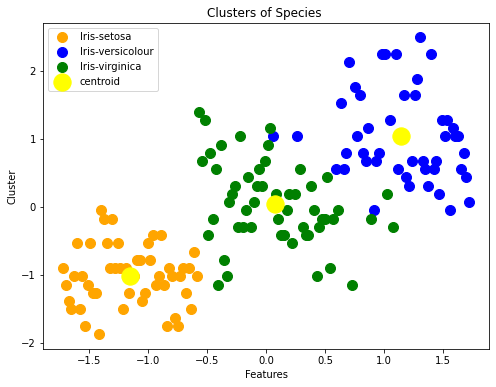

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled[y_pred == 0, 0], df_scaled[y_pred == 0, 1],
            s = 100, label = 'Iris-setosa', c = 'orange')
plt.scatter(df_scaled[y_pred == 1,0], df_scaled[y_pred == 1,1],
            s = 100 ,label = 'Iris-versicolour', c = 'blue')
plt.scatter(df_scaled[y_pred == 2,0], df_scaled[y_pred == 2,1],
            s = 100, label = 'Iris-virginica', c = 'green')
#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 300, label = 'centroid', c = 'yellow')


plt.title('Clusters of Species ')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show


## Therefore optimum number of clusters = 3 and visually represented 
## Thank you